# QA_Prod (v1.2)

In [17]:
%matplotlib inline

In [14]:
# imports
import os
from imp import reload
from desispec.qa import qa_prod as dqap
from matplotlib import pyplot as plt

## Init

    export DESI_SPECTRO_REDUX=/media/xavier/ExtraDrive2/DESI/DESI_SCRATCH/
    export SPECPROD=dc17a2

In [3]:
os.environ['DESI_SPECTRO_REDUX'] = '/media/xavier/ExtraDrive2/DESI/DESI_SCRATCH/'
os.environ['SPECPROD'] = 'dc17a2'

In [4]:
reload(dqap)
qa_prod = dqap.QA_Prod()

## Remake

#### In Python

In [ ]:
qa_prod.remake_frame_qa(remake_plots=True)

#### Script

    desi_qa_prod --remake_frameqa 3  

## Slurp

#### In Python

In [ ]:
qa_prod.slurp(remove=False)

#### Script
    desi_qa_prod --slurp

## Parsing QA Data

In [22]:
reload(dqap)
qa_prod = dqap.QA_Prod()

### Load QA

In [23]:
qa_prod.load_data()

INFO:qa.py:197:load_qa_prod: Loading QA prod file: /media/xavier/ExtraDrive2/DESI/DESI_SCRATCH/dc17a2/dc17a2_qa.json


### One entry

In [24]:
qa_prod.data['20190902']['77']['b0']['FLUXCALIB']

{'METRICS': {'MAX_ZP_OFF': [0.0, 89],
  'NSTARS_FIBER': 10,
  'RMS_ZP': 0.0,
  'ZP': 24.992222701906876},
 'PARAMS': {'MAX_ZP_OFF': 0.2, 'ZP_WAVE': 4800.0}}

### Grab a Table of QA values

In [25]:
qa_tbl = qa_prod.get_qa_table('SKYSUB', 'MED_RESID', channels=['b'])
qa_tbl

MED_RESID,EXPID,DATE-OBS,NIGHT,EXPTIME,AIRMASS,FLAVOR
float64,str3,str23,str8,float64,float64,str7
-2.82676696777,102,2019-09-04T02:57:42.140,20190903,1659.19462354,1.00295168867,science
-0.0353164672852,102,2019-09-04T02:57:42.140,20190903,1659.19462354,1.00295168867,science
-1.5545539856,102,2019-09-04T02:57:42.140,20190903,1659.19462354,1.00295168867,science
-0.122116088867,102,2019-09-04T02:57:42.140,20190903,1659.19462354,1.00295168867,science
-0.644577026367,102,2019-09-04T02:57:42.140,20190903,1659.19462354,1.00295168867,science
-1.24170303345,102,2019-09-04T02:57:42.140,20190903,1659.19462354,1.00295168867,science
-2.8331451416,102,2019-09-04T02:57:42.140,20190903,1659.19462354,1.00295168867,science
4.02098464966,102,2019-09-04T02:57:42.140,20190903,1659.19462354,1.00295168867,science
-1.18046569824,102,2019-09-04T02:57:42.140,20190903,1659.19462354,1.00295168867,science


### Histogram

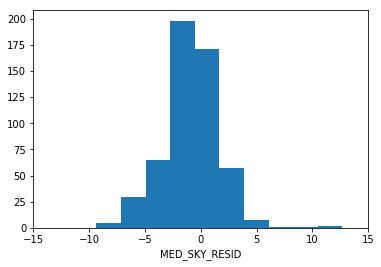

In [18]:
plt.clf()
ax = plt.gca()
ax.hist(qa_tbl['MED_RESID'])
ax.set_xlim(-15,15)
ax.set_xlabel('MED_SKY_RESID')

## Camera Histograms

In [19]:
from desispec.qa import qa_plots as dqqp

/home/xavier/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


### In Python

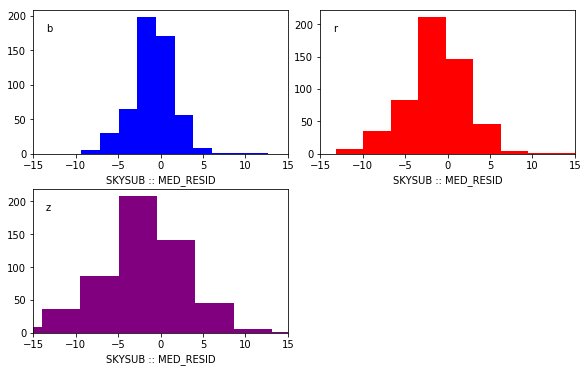

In [28]:
reload(dqqp)
dqqp.prod_channel_hist(qa_prod, 'SKYSUB', 'MED_RESID', xlim=(-15,15))

### Script
     desi_qa_prod --channel_hist=default

## Time Series plot

In [29]:
qatype = 'SKYSUB'
metric = 'MED_RESID'

### In Python

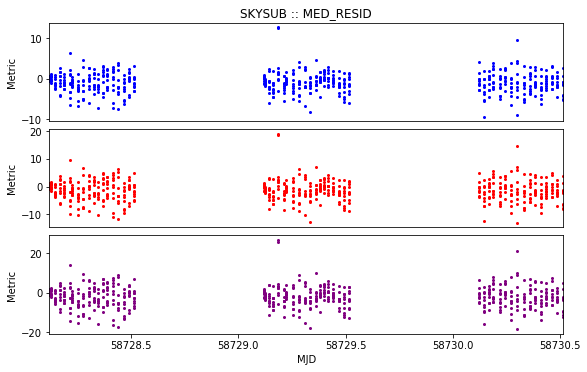

In [31]:
reload(dqqp)
dqqp.prod_time_series(qa_prod, qatype, metric)

### Script
    desi_qa_prod --time_series=SKYSUB-MED_RESID